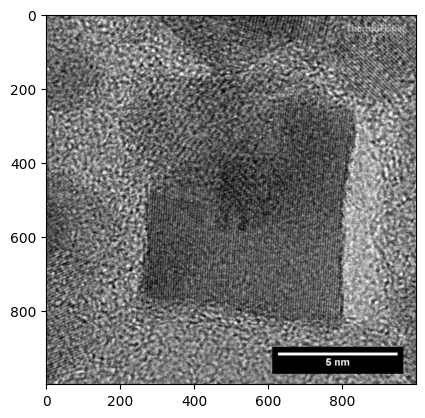

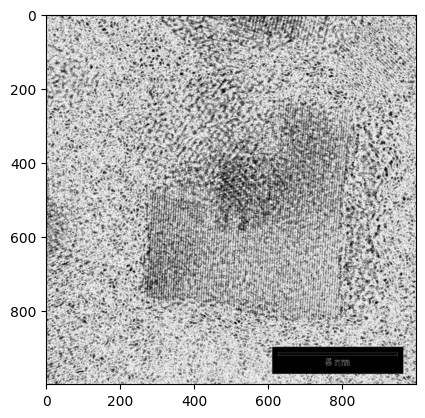

In [1]:
import cv2 as cv
import matplotlib.pyplot as plt
import os 
import numpy as np

org = cv.imread("../images/micro.jpg")
trans = cv.imread("../images/transformed.png")

plt.figure()
plt.imshow(org)
plt.figure()
plt.imshow(trans)            

Text(0, 0.5, 'Transformed intensities')

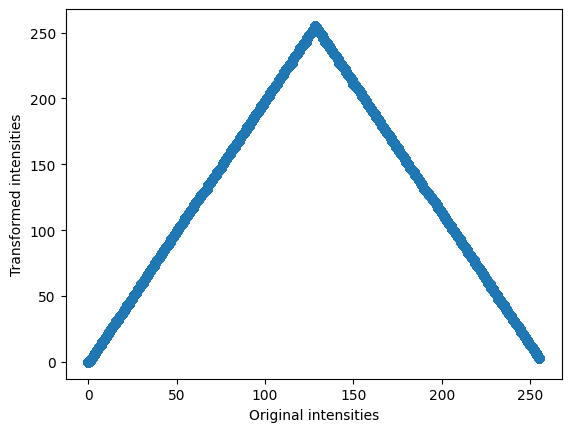

In [16]:
# finding relation between original and transformed intensities
orgarray = org[:,:,0]
orgarray = org.flatten()

transarray = trans[:,:,0]
transarray = trans.flatten()

# to find the range of plot
y = np.max(transarray)
ind = np.where(transarray == y)[0][0]
x = orgarray[ind]

plt.scatter(orgarray, transarray)
plt.xlabel("Original intensities")
plt.ylabel("Transformed intensities")

In [3]:
# applying this transfomation to other images
# but first we need to map this to linear functions
A = [(0,x),(x,y)]
m = (y/x)
c = 0
B = [(m,c),(-m,c)]

In [4]:
def pieceLinear(img,A,B):
    size = len(A)
    x = []
    y = []

    for i in range(size):
        # in numpy instead of using 'and' we use the logical_and function
        cond = np.logical_and(A[i][0] <= img, A[i][1] > img)
        temp = img[cond].flatten()
        
        t = B[i][0] * img[cond] + B[i][1]
        img[cond] = t
        y.append(element for element in t)
        # np.where(img>=A[i][0] and img < A[i][1],B[i][0]*img + B[i][1],img)

    return (img,x,y)

In [9]:
#greyscale function 
def greyscale(img):
    # (w,h) = img.shape[0:2]
    # for i in range(w):
    #     for j in range(h):
    #         (r,g,b) = img[i,j]
    #         img[i,j] = 0.21*r + 0.72*g + 0.07*b
    blue = img[:,:,2]
    red = img[:,:,0]
    green = img[:,:,1]

    blue = 0.07*blue
    green = 0.72*green
    red = 0.21*red

    grey = blue+green+red
    img = (np.stack((grey,grey,grey),axis=2)).astype(np.uint8) #stacking the channels together
    return img

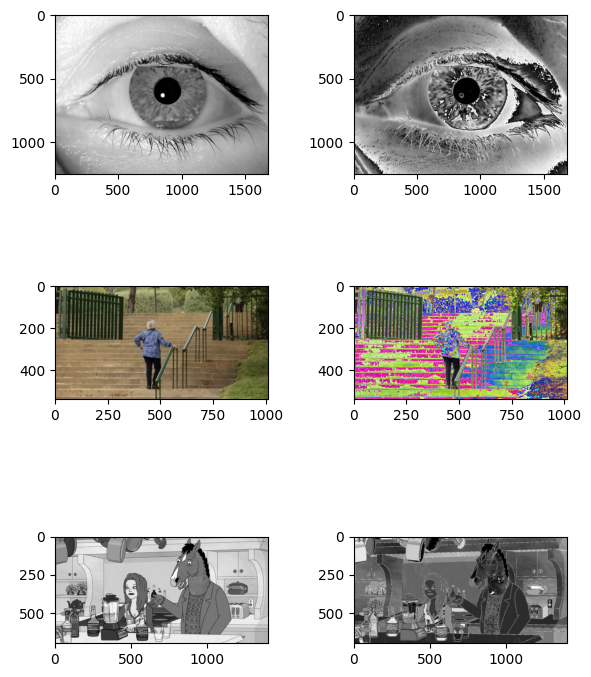

In [15]:
# adjust spacing between plots
plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=0.9,
                    top=1.5,
                    wspace=0.4,
                    hspace=0.4)

img1 = cv.imread("../images/iris1.png")
plt.subplot(3,2,1)
plt.imshow(img1)
(result1,x1,y1) = pieceLinear(img1,A,B)
plt.subplot(3,2,2)
plt.imshow(result1)

img2 = cv.imread("../images/stairs2.png")
img2 = cv.cvtColor(img2,cv.COLOR_BGR2RGB)
# img2 = greyscale(img2)
plt.subplot(3,2,3)
plt.imshow(img2)
(result2,x2,y2) = pieceLinear(img2,A,B)
plt.subplot(3,2,4)
plt.imshow(result2)

img3 = cv.imread("../images/sarah.jpg")
img3 = cv.cvtColor(img3,cv.COLOR_BGR2RGB)
img3 = greyscale(img3)
plt.subplot(3,2,5)
plt.imshow(img3)
(result3,x3,y3) = pieceLinear(img3,A,B)
plt.subplot(3,2,6)
plt.imshow(result3)
